In [1]:
import torch

In [3]:
import pandas as pd

In [ ]:
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from transformers import BertModel

In [7]:
tokenizer_name='bert-base-uncased'
max_length=152

In [14]:
data=pd.read_csv('../Data/tweet_sentiment_dataset.csv')

In [15]:
data

,Tweet,Label
0,Just got promoted! Hard work pays off! 💪 What ...,Positive
1,Spilled coffee on my shirt right before the in...,Negative
2,Feeling great today! Had an amazing dinner wit...,Positive
3,This new playlist is pure joy. Music is life! ...,Positive
4,Why does everything go wrong on Mondays? Worst...,Negative
...,...,...
995,My friends surprised me with a birthday party....,Positive
996,Loving how My laptop just crashed and I lost a...,Negative Sarcasm
997,My friends surprised me with a birthday party....,Positive
998,Feeling great today! This new playlist is pure...,Positive


In [16]:
texts = data['Tweet']
labels = data['Label']

In [17]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [19]:
tokens=tokenizer(
            list(texts), truncation=True, padding=True, max_length=max_length, return_tensors="pt"
        )

In [20]:
tokens

{'input_ids': tensor([[  101,  2074,  2288,  ...,     0,     0,     0],
        [  101, 13439,  4157,  ...,     0,     0,     0],
        [  101,  3110,  2307,  ...,     0,     0,     0],
        ...,
        [  101,  2026,  2814,  ...,     0,     0,     0],
        [  101,  3110,  2307,  ...,     0,     0,     0],
        [  101,  3110,  2307,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [43]:
i=20


In [44]:
print(texts[i])
tokenizer.convert_ids_to_tokens(tokens['input_ids'][i])

Wow, I actually passed the exam! So relieved! Couldn't be happier!


TypeError: list indices must be integers or slices, not str

In [45]:

# Load pretrained BERT model
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize and encode a single tweet
tweet = texts[i]
inputs = tokenizer(tweet, return_tensors="pt", truncation=True, padding=True)

# Get embeddings from BERT
with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.squeeze(0)  # Shape: [seq_len, hidden_dim]

print("Embeddings shape:", embeddings.shape)

Embeddings shape: torch.Size([19, 768])


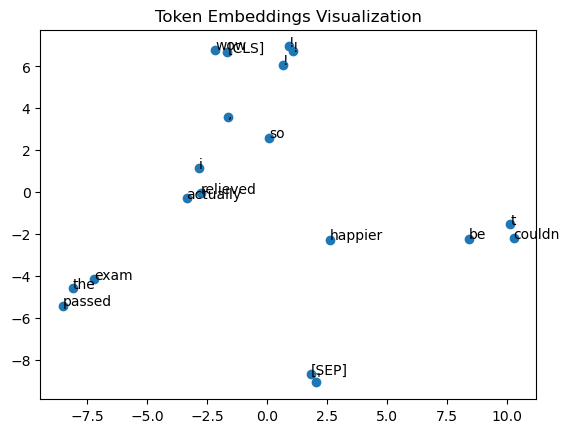

In [46]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings.numpy())

# Plot embeddings
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
for i, token in enumerate(tokens):
    plt.annotate(token, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
plt.title("Token Embeddings Visualization")
plt.show()

In [47]:
 #Load model with attention outputs enabled
model_with_attention = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

# Get attention weights for a single tweet
with torch.no_grad():
    outputs = model_with_attention(**inputs)
    attentions = outputs.attentions  # List of attention weights across layers

print("Number of Layers:", len(attentions))
print("Shape of Attention Weights for First Layer:", attentions[0].shape)

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


Number of Layers: 12
Shape of Attention Weights for First Layer: torch.Size([1, 12, 19, 19])


In [56]:
import bertviz

In [57]:
from IPython.display import display
from bertviz import head_view



In [58]:
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
head_view(attentions, tokens)

<IPython.core.display.Javascript object>